In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pathlib 
from torch.utils.data import random_split, TensorDataset, DataLoader
import torch.utils.data as data 
import sys
from sklearn.model_selection import train_test_split
import os 
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.patches as patches
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models import ResNet50_Weights
import lightning as L
from torchvision import transforms, datasets, models
import torchvision.transforms as T
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torchmetrics
from lightning.pytorch.callbacks import ModelCheckpoint
from lightning.pytorch.loggers import WandbLogger
import argparse
import yaml
from pytorch_lightning.loggers import WandbLogger
from torchmetrics.detection.mean_ap import MeanAveragePrecision
import argparse
import albumentations as A
from albumentations.pytorch import ToTensorV2


sys.path.append("..")


from load_config import load_config, get_parameter
from classes_dataset_DDSM import DDSM_DataModule
from classes_model_DDSM import DDSM_CustomModel



# Training the model
# Para que ejecute en terminal : python train_mamo_DDSM.py --config_file base_config.yaml
if __name__ == "__main__":

    config = load_config('base_config.yaml', #override_file=args.overrides
 )

    
    GPU_TYPE = get_parameter(config, ["General", "gpu_type"],"None")
    if GPU_TYPE == "RTX 3090":
        torch.set_float32_matmul_precision('medium') # recomended for RTX 3090
   

    model = fasterrcnn_resnet50_fpn(num_classes=2, weights_backbone=ResNet50_Weights.IMAGENET1K_V1)
    data_module = DDSM_DataModule(config=config)

    Lmodel = DDSM_CustomModel(model)


/home/lloprib/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/albumentations/core/validation.py:111: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


torch.Size([3, 640, 640])
tensor([[452.5000, 223.1429, 533.5714, 268.5714]])
Min pixel value: 0.0
Max pixel value: 0.9921569228172302


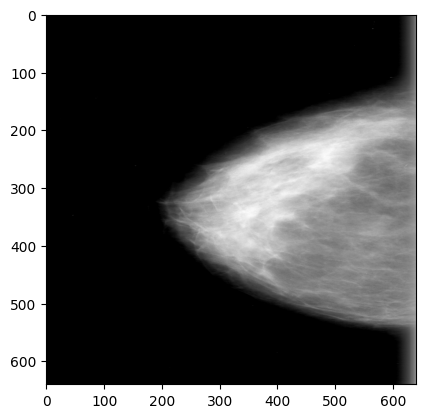

In [2]:

first_batch = next(iter(data_module.val_dataloader()))
images, targets = first_batch

idx=2

print(images[idx].shape)
print(targets[idx]['boxes'])


import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import cv2

fig, ax = plt.subplots(1)
ax.imshow(images[idx].permute(1, 2, 0).cpu().numpy())
min_pixel = images[idx].min().item()
max_pixel = images[idx].max().item()

print(f"Min pixel value: {min_pixel}")
print(f"Max pixel value: {max_pixel}")

plt.show()
